In [1]:
!pip install pyspark
!pip install pandas
!pip install findspark

  Using cached pyspark-3.5.0.tar.gz (316.9 MB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
Using legacy 'setup.py install' for pyspark, since package 'wheel' is not installed.
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.5
    Uninstalling py4j-0.10.9.5:
      Successfully uninstalled py4j-0.10.9.5
    Running setup.py install for pyspark: started
    Running setup.py install for pyspark: finished with status 'done'


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pyspark
import pandas as pd

import findspark
findspark.init()

In [3]:
# data = pd.read_csv("./data/ds_salaries.csv")
# data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

### Create Session

In [3]:
spark = SparkSession.builder.appName('Assignment').getOrCreate()

### Create context

In [5]:
sc = spark.sparkContext

In [12]:
spark

In [13]:
df_pyspark = spark.read.csv("./data/ds_salaries.csv");
df_pyspark.show()

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|      _c0|             _c1|            _c2|                 _c3|   _c4|            _c5|          _c6|               _c7|         _c8|             _c9|        _c10|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
|     2023|              SE|             FT|Principal Data Sc...| 80000|            EUR|        85847|                ES|         100|              ES|           L|
|     2023|              MI|             CT|         ML Engineer| 30000|            USD|        30000|                US|         100|              US|           S|
|     2023

### parallelize example


In [6]:
data = [1,2,3,4,5]
rdd = sc.parallelize(data)

In [7]:
data = [1,2,3,4,5]
rdd = sc.parallelize(data)
squred_root = rdd.map(lambda x: x*2);
print("map():", squred_root.collect())

### Load dataset with header as column names

In [16]:
spark_data = spark.read.option('header', 'true').csv("./data/ds_salaries.csv")
spark_data.show()

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|     2023|              SE|             FT|Principal Data Sc...| 80000|            EUR|        85847|                ES|         100|              ES|           L|
|     2023|              MI|             CT|         ML Engineer| 30000|            USD|        30000|                US|         100|              US|           S|
|     2023|              MI|             CT|         ML Engineer| 25500|            USD|        25500|                US|         100|              US|           S|
|     2023

In [17]:
spark_data.head(10)

[Row(work_year='2023', experience_level='SE', employment_type='FT', job_title='Principal Data Scientist', salary='80000', salary_currency='EUR', salary_in_usd='85847', employee_residence='ES', remote_ratio='100', company_location='ES', company_size='L'),
 Row(work_year='2023', experience_level='MI', employment_type='CT', job_title='ML Engineer', salary='30000', salary_currency='USD', salary_in_usd='30000', employee_residence='US', remote_ratio='100', company_location='US', company_size='S'),
 Row(work_year='2023', experience_level='MI', employment_type='CT', job_title='ML Engineer', salary='25500', salary_currency='USD', salary_in_usd='25500', employee_residence='US', remote_ratio='100', company_location='US', company_size='S'),
 Row(work_year='2023', experience_level='SE', employment_type='FT', job_title='Data Scientist', salary='175000', salary_currency='USD', salary_in_usd='175000', employee_residence='CA', remote_ratio='100', company_location='CA', company_size='M'),
 Row(work_year

In [18]:
spark_data.describe().limit(10)

DataFrame[summary: string, work_year: string, experience_level: string, employment_type: string, job_title: string, salary: string, salary_currency: string, salary_in_usd: string, employee_residence: string, remote_ratio: string, company_location: string, company_size: string]

In [21]:
# spark_data.describeSchema()

In [22]:
from pyspark.sql.functions import col, sum

In [23]:
n_missing  = spark_data.agg(*[sum(col(c).isNull().cast('int')).alias(c + '_missing') for c in spark_data.columns]).collect()[0]
n_missing

Row(work_year_missing=0, experience_level_missing=0, employment_type_missing=0, job_title_missing=0, salary_missing=0, salary_currency_missing=0, salary_in_usd_missing=0, employee_residence_missing=0, remote_ratio_missing=0, company_location_missing=0, company_size_missing=0)

In [24]:
n_col = "experience_level"
data = spark_data.select(n_col).dropna().rdd.flatMap(lambda x: x).collect()

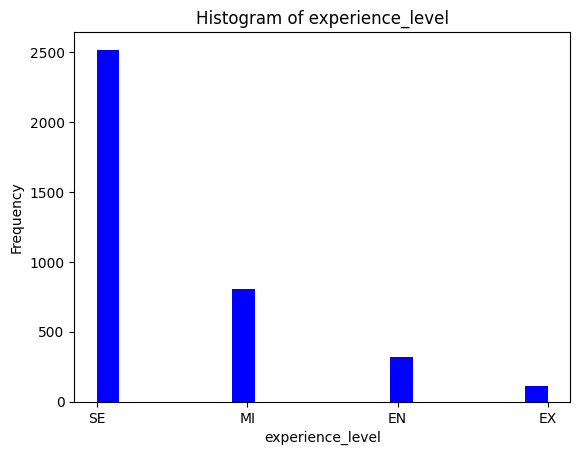

In [25]:
import matplotlib.pyplot as plt
plt.hist(data, bins = 20 , color = 'blue')
plt.title(f'Histogram of {n_col}')
plt.xlabel(n_col)
plt.ylabel('Frequency')
plt.show()

In [26]:
cor_matrix = spark_data.select([col(c).cast("float") for c in spark_data.columns]).toPandas().corr()
cor_matrix

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,NaN,NaN,NaN,-0.094724,NaN,0.228290,NaN,-0.236430,NaN,NaN
experience_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,-0.094724,NaN,NaN,NaN,1.000000,NaN,-0.023676,NaN,0.028731,NaN,NaN
salary_currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,0.228290,NaN,NaN,NaN,-0.023676,NaN,1.000000,NaN,-0.064171,NaN,NaN
employee_residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,-0.236430,NaN,NaN,NaN,0.028731,NaN,-0.064171,NaN,1.000000,NaN,NaN
company_location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
### convert country code to country
# !pip install pycountry

import pycountry

def get_country_name(country_code):
    try:
        country = pycountry.countries.get(alpha_2=country_code)
        return country.name
    except AttributeError:
        return "Unknown"

# Example usage
country_code = "US"
country_name = get_country_name(country_code)
print(f"The country name for code {country_code} is: {country_name}")



You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
